# Principal component Analysis(PCA)
> Principal components this way, will allow you to reduce dimensionality without losing much information, and this by discarding the components with low information and considering the remaining components as your new variables. 

1. Subtract the mean and dividing by the standard deviation for each value of each variable.

2. After standardization all the variables will be transformed to the same scale.

3. Then apply coveriance matrix computation because  to see if there is any relationship between them or not.

4. Eigenvectors and eigenvalues are the linear algebra concepts that we need to compute from the covariance matrix in order to determine the principal components of the data.

5. now choose whether to keep all these components or discard those of lesser significance (of low eigenvalues), and form with the remaining ones a matrix of vectors.

6. In last multiplying the transpose of the original data set by the transpose of the feature vector.

### importing the libraries

In [30]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
dataset = pd.read_csv('Wine.csv')
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [33]:
X = dataset.iloc[:,0:13].values
y = dataset.iloc[:,13].values

In [34]:
#split data in train test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [35]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =  sc.transform(X_test)

In [36]:
#apply pca
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test  = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.36884109 0.19318394 0.10752862 0.07421996 0.06245904 0.04909
 0.04117287 0.02495984 0.02308855 0.01864124 0.01731766 0.01252785
 0.00696933]


In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test  = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.36884109 0.19318394]


Text(0.5, 1.0, 'Visualize the PCA for train_set')

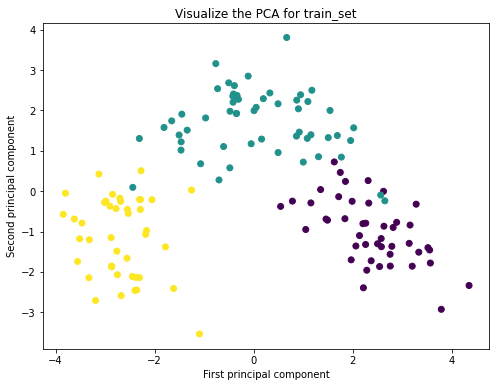

In [38]:
# Visualize the PCA for train_set

plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c = y_train)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Visualize the PCA for train_set')

Text(0.5, 1.0, 'Visualize the PCA for test_set')

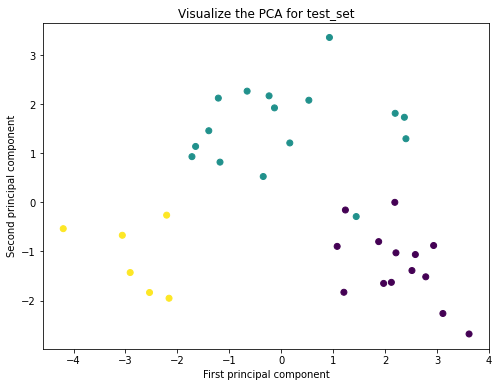

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0],X_test[:,1],c = y_test)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Visualize the PCA for test_set')

In [40]:
#Fitting Logistic regression on the train set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [41]:
#predict the test set
y_pred = classifier.predict(X_test)
y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

In [42]:
# Evaluate the prediction

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
0.9722222222222222


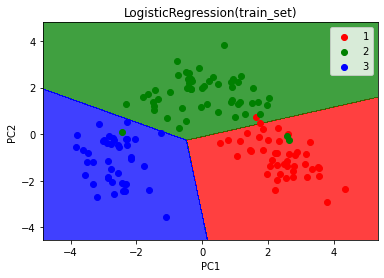

In [43]:
# visualizing the training set result

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start =  X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start =  X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
               color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('LogisticRegression(train_set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

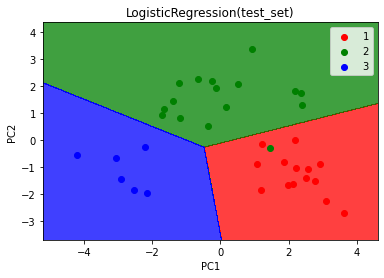

In [44]:
# visualizing the test set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start =  X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start =  X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
               color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('LogisticRegression(test_set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()